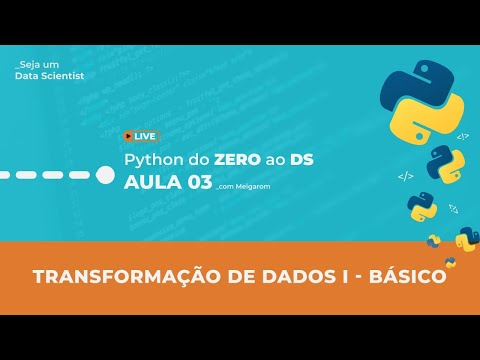

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('rks0EcFjCUQ')

### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import the libraries and read the dataset

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (10, 4)
import plotly.express as px

In [4]:
data = pd.read_csv('/content/drive/MyDrive/datasets/diversos/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Questions

In [5]:
''' 1. Crie uma nova coluna chamada 'dormitory_type'

* se o valor da coluna 'berdrooms' for igual a 1 -> studio 
* se o valor da coluna 'berdrooms' for igual a 2 -> apartament 
* se o valor da coluna 'berdrooms' > 2 -> house '''

data['dormitory_type'] = 'kitnet'
data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment' 
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartment
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house


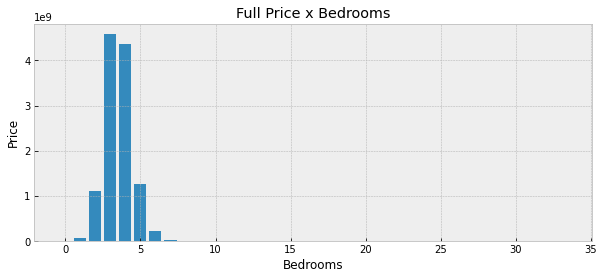

In [6]:
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos
price_bedrooms = data.groupby('bedrooms')['price'].sum().reset_index()

plt.bar(price_bedrooms['bedrooms'], price_bedrooms['price'])
plt.title('Full Price x Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.show()

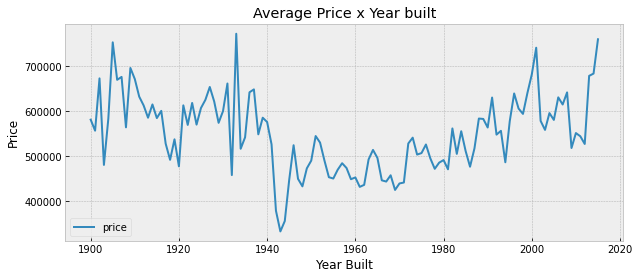

In [7]:
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano da construção dos imóveis

price_year = data.groupby('yr_built')['price'].mean().reset_index()

# using pandas plot
price_year.plot('yr_built')
plt.title('Average Price x Year built')
plt.xlabel('Year Built')
plt.ylabel('Price')

plt.show()

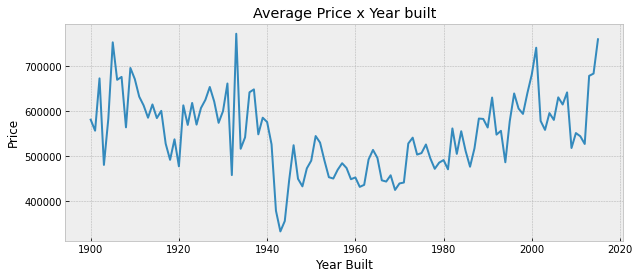

In [8]:
# using matplotlib plot
plt.plot(price_year['yr_built'], price_year['price'])
plt.title('Average Price x Year built')
plt.xlabel('Year Built')
plt.ylabel('Price')

plt.show()

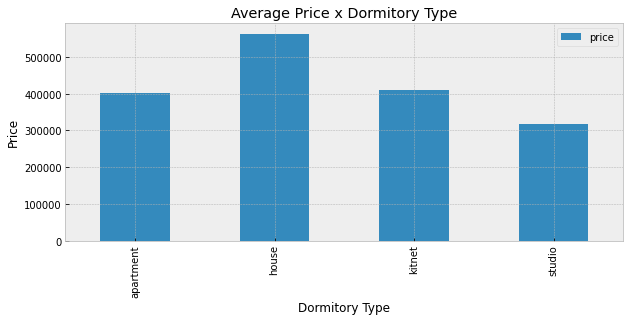

In [9]:
# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios
dt_avg = data.groupby('dormitory_type')['price'].mean().reset_index()

# using pandas plot
dt_avg.plot(x='dormitory_type', kind='bar')
plt.title('Average Price x Dormitory Type')
plt.xlabel('Dormitory Type')
plt.ylabel('Price')

plt.show()

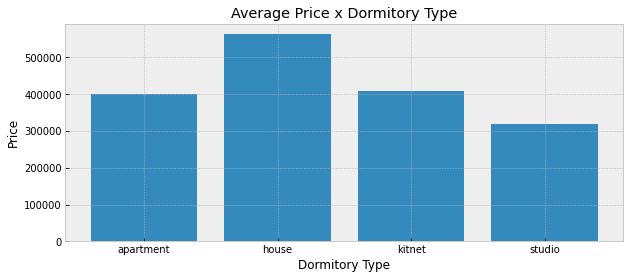

In [10]:
#  using matplotlib plot
plt.bar(dt_avg['dormitory_type'], dt_avg['price'])
plt.title('Average Price x Dormitory Type')
plt.xlabel('Dormitory Type')
plt.ylabel('Price')

plt.show()

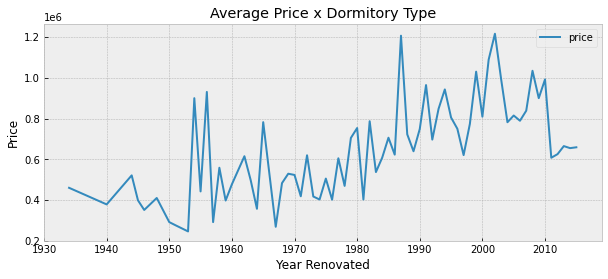

In [11]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930
price_1930 = data[data['yr_renovated'] >= 1930].groupby('yr_renovated')['price'].mean().reset_index()

# using pandas plot
price_1930.plot(x='yr_renovated')
plt.title('Average Price x Dormitory Type')
plt.xlabel('Year Renovated')
plt.ylabel('Price')

plt.show()

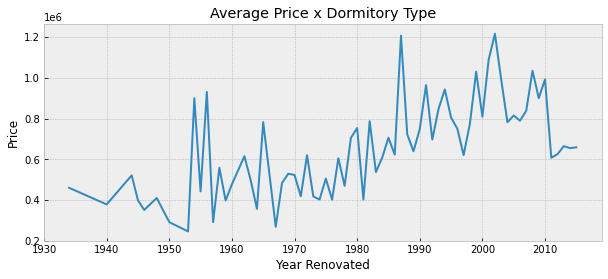

In [12]:
# using matplotlib plot
plt.plot(price_1930['yr_renovated'], price_1930['price'])
plt.title('Average Price x Dormitory Type')
plt.xlabel('Year Renovated')
plt.ylabel('Price')

plt.show()

In [13]:
# 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis

data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartment      589533.33
         house          584854.27
         studio         398944.00
1901     apartment      452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartment      543250.00
         house          797383.06
         studio         385195.00

[314 rows x 1 columns]

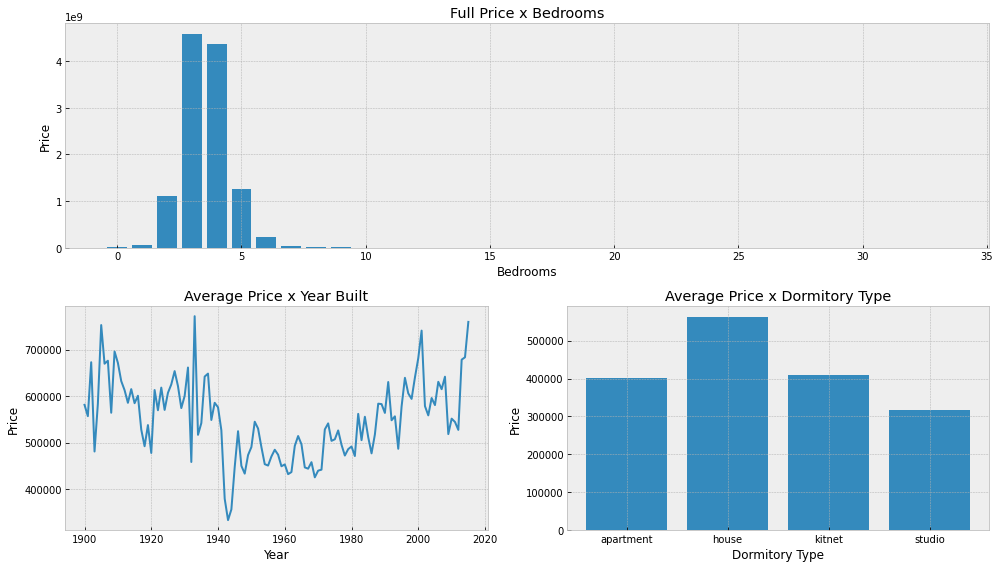

In [14]:
# 7. Crie um Dashboard com os gráficos das questões 02,03,04 (1 linha e 2 colunas)

fig = plt.figure(figsize=(14, 8))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(specs[0, :]) #first row
ax2 = fig.add_subplot(specs[1, 0]) # second row, first column
ax3 = fig.add_subplot(specs[1, 1]) #second row, second column

# graph1
ax1.bar(price_bedrooms['bedrooms'], price_bedrooms['price'])
ax1.set_title('Full Price x Bedrooms')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Price')

# graph2
ax2.plot(price_year['yr_built'], price_year['price'])
ax2.set_title('Average Price x Year Built')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price')

# graph3
ax3.bar(dt_avg['dormitory_type'], dt_avg['price'])
ax3.set_title('Average Price x Dormitory Type')
ax3.set_xlabel('Dormitory Type')
ax3.set_ylabel('Price')

fig.tight_layout()
plt.show()

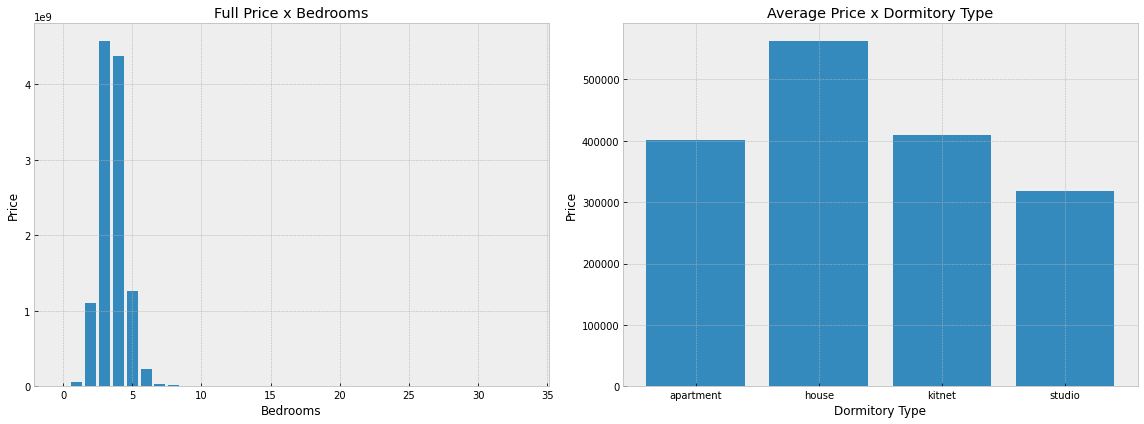

In [15]:
# 8. Crie um Dashboard com os gráficos das questões 02 e 04 (2 colunas)

fig = plt.figure(figsize=(16, 6))

specs = gridspec.GridSpec(nrows=1, ncols=2)
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

#graph 1
ax1.bar(price_bedrooms['bedrooms'], price_bedrooms['price'])
ax1.set_title('Full Price x Bedrooms')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Price')

# graph 2
ax2.bar(dt_avg['dormitory_type'], dt_avg['price'])
ax2.set_title('Average Price x Dormitory Type')
ax2.set_xlabel('Dormitory Type')
ax2.set_ylabel('Price')

fig.tight_layout()
plt.show()

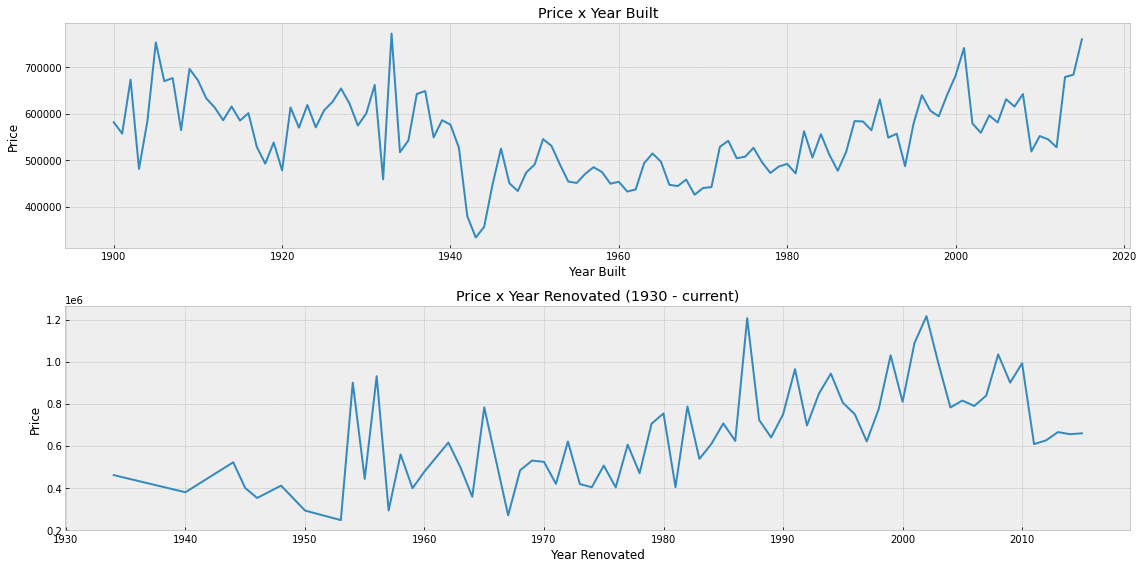

In [16]:
# 9. Crie um Dashboard com os gráficos das questões 3 e 5 (2 linhas)

fig = plt.figure(figsize=(16, 8))
specs = gridspec.GridSpec(nrows=2, ncols=1)
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

# graph 1
ax1.plot(price_year['yr_built'], price_year['price'])
ax1.set_title('Price x Year Built')
ax1.set_xlabel('Year Built')
ax1.set_ylabel('Price')

# graph 2
ax2.plot(price_1930['yr_renovated'], price_1930['price'])
ax2.set_title('Price x Year Renovated (1930 - current)')
ax2.set_xlabel('Year Renovated')
ax2.set_ylabel('Price')

fig.tight_layout()

plt.show()

In [17]:
# 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

df = data[['id', 'lat', 'long', 'sqft_living', 'price']]
fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="id",
                        hover_data=["price"], size="sqft_living",
                        color_discrete_sequence=['rgb(0, 134, 149)'],
                        zoom=8, height=300)
                  
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=400, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()